<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/KEMIGISHA_BENADINE_(PRACTICE_EXERCISE)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Clusters with Principal Component Analysis

In this exercise you will cluster credit card customer data using 8 features and visualize those clusters in a two-dimensional scatter plot.

In order to accomplish this, you will:
1. Import libraries
2. Load data
3. Drop unneeded columns
4. Explore the data and clean as needed
5. Scale the Data
6. Tune a KMeans model and cluster the scaled data using all of the features.
7. Transform the scaled data using PCA
8. Create a scatter plot of the first 2 principal components of the PCA data, colored by the labels from the KMeans model.
9. Bonus: Create a 3D scatter plot using Plotly Express scatter_3d() function using the first 3 principal components of the PCA data as the x, y, and z axes and the labels from the KMeans model as the color.

[Documentation for scatter_3d from Plotly Express](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

# 1. Import Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 2. Load Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfsaRE3Pq4HcnCgIb5hgszzYNcKQBoypmZm2zW9Q9hU9-tWdtP8qxBBsiUWMFKzG66unPOdi-lfKdM/pub?gid=794640114&single=true&output=csv')

df.head()

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
0           0            1   41    2               6      19      0.124   
1           1            2   47    1              26     100      4.582   
2           2            3   33    2              10      57      6.111   
3           3            4   29    2               4      19      0.681   
4           4            5   47    1              31     253      9.308   

   Other Debt  Defaulted  DebtIncomeRatio  
0       1.073        0.0              6.3  
1       8.218        0.0             12.8  
2       5.802        1.0             20.9  
3       0.516        0.0              6.3  
4       8.908        0.0              7.2

# 3. Drop Unnecessary Columns

In [ ]:
df.drop(["Unnamed: 0",'Customer Id','Defaulted'],axis=1,inplace=True)##drpped the defaulted column since we are going to perform unsupervised learning


Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0     41    2               6      19      0.124       1.073              6.3
1     47    1              26     100      4.582       8.218             12.8
2     33    2              10      57      6.111       5.802             20.9
3     29    2               4      19      0.681       0.516              6.3
4     47    1              31     253      9.308       8.908              7.2
..   ...  ...             ...     ...        ...         ...              ...
845   27    1               5      26      0.548       1.220              6.8
846   28    2               7      34      0.359       2.021              7.0
847   25    4               0      18      2.802       3.210             33.4
848   32    1              12      28      0.116       0.696              2.9
849   52    1              16      64      1.866       3.638              8.6

[850 rows x 7 columns]

# 4. EDA and Cleaning

In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
##CHECKING FOR MISSING VALUES
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

In [ ]:
##Exploratory data analysis using using ydata profiling
%pip install ydata-profiling
from ydata_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 45.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 5. Scale Data

In [ ]:
##applying the standard  scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data



array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.68381116,
        -0.59048916, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.41447366,
         1.51296181,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  2.13414111,
         0.80170393,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.5766659 ,
         0.03863257,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.68757659,
        -0.70147601, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.13611081,
         0.16463355, -0.2340332 ]])

# 6. Tune a KMeans Model and Cluster the Scaled Data Using All Features

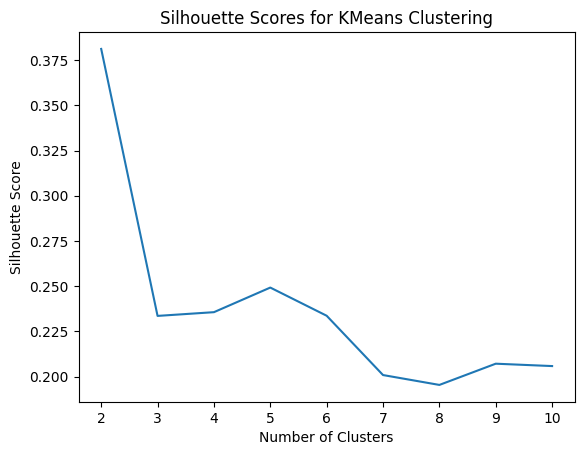

In [ ]:

# Calculating silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting  the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans Clustering")
plt.show()


In [ ]:
##from the plot
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(scaled_data)


KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
##adding the cluster the dataframe
cluster_labels = kmeans.labels_
df['cluster_labels'] = cluster_labels
df

Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0     41    2               6      19      0.124       1.073              6.3   
1     47    1              26     100      4.582       8.218             12.8   
2     33    2              10      57      6.111       5.802             20.9   
3     29    2               4      19      0.681       0.516              6.3   
4     47    1              31     253      9.308       8.908              7.2   
..   ...  ...             ...     ...        ...         ...              ...   
845   27    1               5      26      0.548       1.220              6.8   
846   28    2               7      34      0.359       2.021              7.0   
847   25    4               0      18      2.802       3.210             33.4   
848   32    1              12      28      0.116       0.696              2.9   
849   52    1              16      64      1.866       3.638              8.6   

     cluster_labels  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
..              ...  
845               0  
846               0  
847               0  
848               0  
849               1  

[850 rows x 8 columns]

In [ ]:
##evaluating the cluster quality
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.38115575548634506


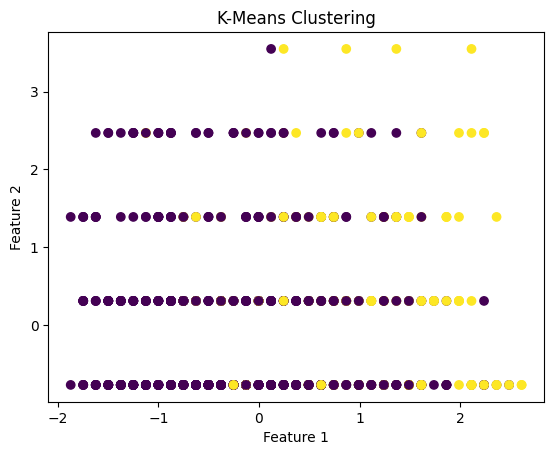

In [ ]:
##visualising the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# 7. Transform the Scaled Data with PCA

In [ ]:
# Applying PCA to the scaled data, and retaining 85% of the variance
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 8. Plot the Clusters

- The x axis should be the first principal component, you can extract this from the PCA array with `pca_data[:, 0]`

- The y axis should be the second principal component, you can extract this from the PCA array with `pca_data[:, 1]`

- The `c` argument should be the labels from the kmeans model.

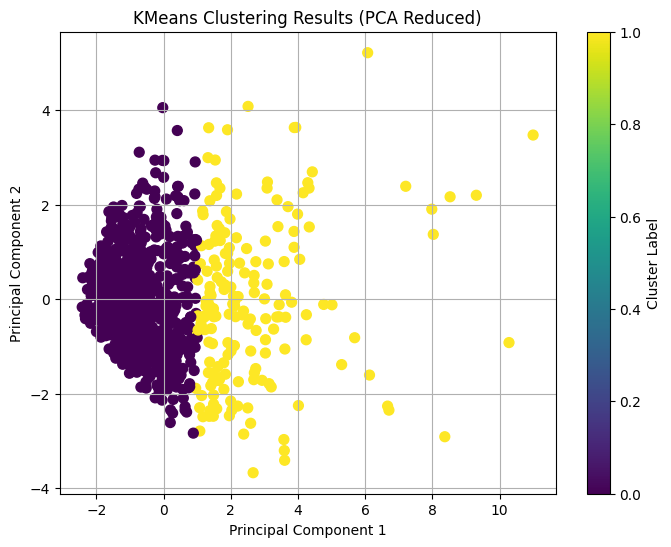

In [ ]:
# Plot the clusters using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results (PCA Reduced)')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

# 9. BONUS Plot 3 components with Plotly Express

x, y, and z should be the first 3 components and color should be the KMeans model clusters.

[scatter_3d documentation](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)

In [ ]:
# Apply PCA to the scaled data to get 3 components for 3D plotting
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(x=pca_data_3d[:, 0], y=pca_data_3d[:, 1], z=pca_data_3d[:, 2],
                    color=cluster_labels.astype(str), # Convert labels to string for discrete colors
                    title='KMeans Clustering Results (3D PCA)')
fig.show()